In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt 
import seaborn as sns 


# Setting Database

In [2]:
# read CSV files 
brands = pd.read_csv('brands.csv')
categories = pd.read_csv('categories.csv')
customers = pd.read_csv('customers.csv')
order_items = pd.read_csv('order_items.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
staffs = pd.read_csv('staffs.csv')
stocks = pd.read_csv('stocks.csv')
stores = pd.read_csv('stores.csv')

#Create database connection
connection = sqlite3.connect('bike_store.db')

In [3]:
#Insert datas into database
brands.to_sql('brands', connection, if_exists='replace', index=False)
categories.to_sql('categories', connection, if_exists='replace', index=False)
customers.to_sql('customers', connection, if_exists='replace', index=False)
order_items.to_sql('order_items', connection, if_exists='replace', index=False)
orders.to_sql('orders', connection, if_exists='replace', index=False)
products.to_sql('products', connection, if_exists='replace', index=False)
staffs.to_sql('staffs', connection, if_exists='replace', index=False)
stocks.to_sql('stocks', connection, if_exists='replace', index=False)
stores.to_sql('stores', connection, if_exists='replace', index=False)

3

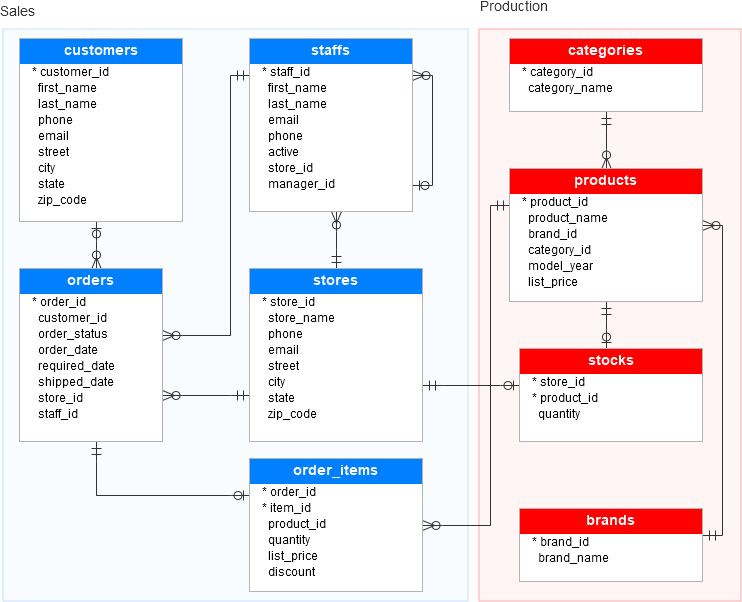 #Data Diagram

This database is from https://www.sqlservertutorial.net/sql-server-sample-database/. it contains datas of customers, products, shop information from three bicycle shops]

In [4]:
query = """ 
select 
    products.brand_id, 
    brands.brand_name,
    products.product_name,
    products.category_id, 
    products.list_price,
    categories.category_name
FROM 
    products 
    join brands on
    products.brand_id = brands.brand_id
    join categories on 
    products.category_id = categories.category_id
"""
df = pd.read_sql_query(query, connection)
df

,brand_id,brand_name,product_name,category_id,list_price,category_name
0,9,Trek,Trek 820 - 2016,6,379.99,Mountain Bikes
1,5,Ritchey,Ritchey Timberwolf Frameset - 2016,6,749.99,Mountain Bikes
2,8,Surly,Surly Wednesday Frameset - 2016,6,999.99,Mountain Bikes
3,9,Trek,Trek Fuel EX 8 29 - 2016,6,2899.99,Mountain Bikes
4,3,Heller,Heller Shagamaw Frame - 2016,6,1320.99,Mountain Bikes
...,...,...,...,...,...,...
316,9,Trek,Trek Checkpoint ALR 5 - 2019,7,1999.99,Road Bikes
317,9,Trek,Trek Checkpoint ALR 5 Women's - 2019,7,1999.99,Road Bikes
318,9,Trek,Trek Checkpoint SL 5 Women's - 2019,7,2799.99,Road Bikes
319,9,Trek,Trek Checkpoint SL 6 - 2019,7,3799.99,Road Bikes


by joining brands column to products and categories on products column, briefly calling informations about products.


# which type of bicycle (category) was most sold? 

In [5]:
query = """
SELECT  
    order_items.list_price, 
    products.model_year, 
    brands.brand_name, 
    products.product_name,
    sum(order_items.quantity) AS total_quantity, 
    categories.category_name


    FROM orders 

    JOIN brands on 
    products.brand_id = brands.brand_id

    JOIN products on 
    order_items.product_id = products.product_id

    JOIN order_items on 
    orders.order_id = order_items.order_id 

    JOIN categories on
    products.category_id = categories.category_id

Group by 
    categories.category_name

order by 
    total_quantity desc
"""

df3 = pd.read_sql_query(query, connection)
df3

,list_price,model_year,brand_name,product_name,total_quantity,category_name
0,599.99,2016,Electra,Electra Townie Original 7D EQ - 2016,2063,Cruisers Bicycles
1,2899.99,2016,Trek,Trek Fuel EX 8 29 - 2016,1755,Mountain Bikes
2,269.99,2016,Electra,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,1179,Children Bicycles
3,599.99,2016,Electra,Electra Townie Original 7D EQ - 2016,813,Comfort Bicycles
4,749.99,2017,Surly,Surly Ogre Frameset - 2017,559,Road Bikes
5,1549.00,2016,Surly,Surly Straggler - 2016,394,Cyclocross Bicycles
6,2999.99,2016,Trek,Trek Conduit+ - 2016,315,Electric Bikes


# Best_selling bicycle category by years 

In [6]:
query = """
WITH product_categories AS (
    SELECT
        product_id,
        category_name
    FROM
        products
    JOIN categories on
    products.category_id = categories.category_id
),

product_sales_ym AS (
    SELECT
        strftime('%Y', order_date) AS year,
        product_id,
        SUM(quantity) AS units_sold
    FROM
        orders
    JOIN
        order_items
    ON
        orders.order_id = order_items.order_id
    GROUP BY
        1, 2
)

SELECT
    year,
    category_name,
    SUM(units_sold) AS total_units_sold
FROM
    product_sales_ym
INNER JOIN
    product_categories
ON
    product_sales_ym.product_id = product_categories.product_id
GROUP BY
    year, category_name;
"""

df4= pd.read_sql_query(query, connection)
df4

,year,category_name,total_units_sold
0,2016,Children Bicycles,350
1,2016,Comfort Bicycles,313
2,2016,Cruisers Bicycles,924
3,2016,Cyclocross Bicycles,233
4,2016,Electric Bikes,104
5,2016,Mountain Bikes,739
6,2017,Children Bicycles,589
7,2017,Comfort Bicycles,373
8,2017,Cruisers Bicycles,814
9,2017,Cyclocross Bicycles,128


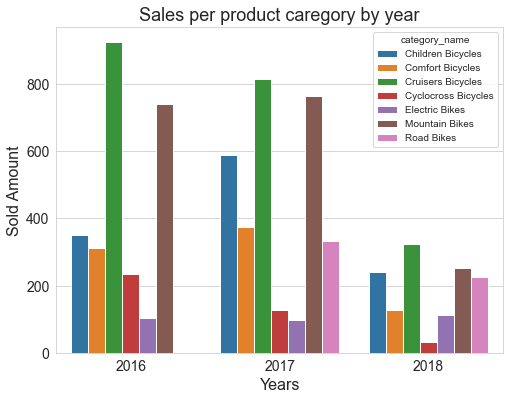

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 6))
sns.barplot(data = df4, x = 'year', y = 'total_units_sold', hue = 'category_name')

plt.title('Sales per product caregory by year', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Sold Amount', fontsize = 16)
plt.yticks(fontsize = 14)
plt.show()

# Number of repeat buyers and one_time buyer

In [52]:
query = """
SELECT
    customer_id,
    CASE
        when count(order_id) > 1 THEN 'repeat buyer'
    ELSE
        'one-time buyer'
    END AS purchase_frequency
FROM orders

GROUP BY  
    customer_id
"""

df = pd.read_sql_query(query, connection)
df

,customer_id,purchase_frequency
0,1,repeat buyer
1,2,repeat buyer
2,3,repeat buyer
3,4,repeat buyer
4,5,repeat buyer
...,...,...
1440,1441,one-time buyer
1441,1442,one-time buyer
1442,1443,one-time buyer
1443,1444,one-time buyer


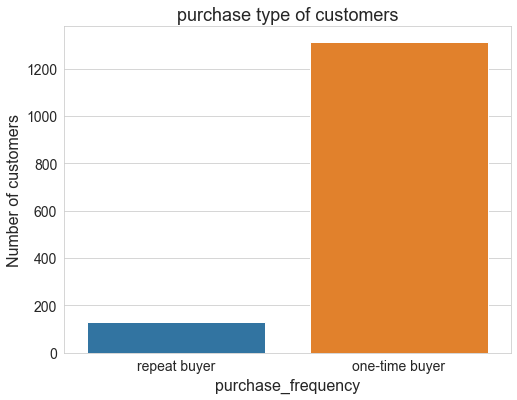

In [53]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'purchase_frequency')

plt.title('purchase type of customers', fontsize = 18)
plt.xlabel('purchase_frequency', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Number of customers', fontsize = 16)
plt.yticks(fontsize = 14)
plt.show()

# Average days between orders from Repeat buyers

In [10]:
#finding maximum and minimum avg_days between orders from customers
query = """
SELECT
    customer_id,
    AVG(julianday(order_date) - julianday(prev_order_date)) AS avg_days_between_orders
FROM
    (
     SELECT
         customer_id,
         order_date,
         LAG(order_date) OVER (PARTITION BY customer_id ORDER BY order_date) AS prev_order_date
     FROM
         orders
    ) subquery
WHERE
    prev_order_date IS NOT NULL
GROUP BY
    customer_id
ORDER BY avg_days_between_orders desc
"""

df = pd.read_sql_query(query, connection)
df

,customer_id,avg_days_between_orders
0,60,837.0
1,91,832.0
2,175,829.0
3,57,822.0
4,80,821.0
...,...,...
126,92,70.0
127,63,66.0
128,109,56.0
129,117,7.0


In [55]:
#gruoping into three types of purchase_interval
query = """
SELECT
    customer_id,
    CASE
        WHEN AVG(julianday(order_date) - julianday(prev_order_date)) >= 730 THEN 'Long-inverval customers'
        WHEN AVG(julianday(order_date) - julianday(prev_order_date)) BETWEEN 300 and 730 THEN 'Mid - interval customers'
        WHEN AVG(julianday(order_date) - julianday(prev_order_date)) <= 300 THEN 'Periodic Buyers'
        ELSE 'other' 
    END AS AVG_purchase_interval
    
FROM
    (select 
    order_date,
    customer_id,
    LAG(order_date) OVER (PARTITION BY customer_id ORDER BY order_date) AS prev_order_date
    
    FROM 
        orders
    )

WHERE
    prev_order_date is not NULL
GROUP BY 
    customer_id

"""

df = pd.read_sql_query(query, connection)
df


,customer_id,AVG_purchase_interval
0,1,Mid - interval customers
1,2,Periodic Buyers
2,3,Periodic Buyers
3,4,Periodic Buyers
4,5,Mid - interval customers
...,...,...
126,231,Periodic Buyers
127,233,Mid - interval customers
128,237,Mid - interval customers
129,239,Periodic Buyers


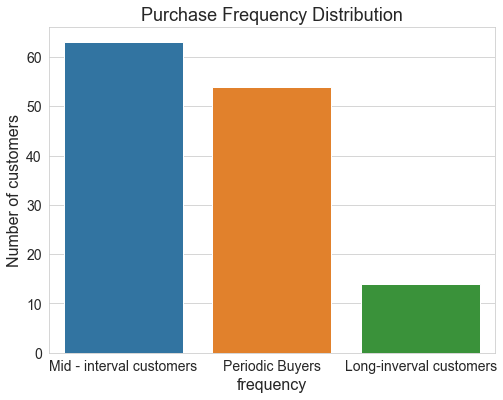

In [56]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'AVG_purchase_interval')
plt.title('Purchase Frequency Distribution', fontsize = 18)
plt.xlabel('frequency', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Number of customers', fontsize = 16)
plt.yticks(fontsize = 14)
plt.show()

# List of best-selling products, brands and type

In [13]:
query = """ 
SELECT 
    products.product_id, 
    products.model_year, 
    sum(order_items.quantity) AS total_quantity, 
    products.product_name

FROM order_items
JOIN products ON 
order_items.product_id = products.product_id

GROUP BY 
    product_name, products.product_name, products.model_year

ORDER BY 
    total_quantity DESC
"""
df = pd.read_sql_query(query, connection)
df


,product_id,model_year,total_quantity,product_name
0,13,2016,296,Electra Cruiser 1 (24-Inch) - 2016
1,16,2016,290,Electra Townie Original 7D EQ - 2016
2,12,2016,289,Electra Townie Original 21D - 2016
3,22,2016,269,Electra Girl's Hawaii 1 (16-inch) - 2015/2016
4,6,2016,167,Surly Ice Cream Truck Frameset - 2016
...,...,...,...,...
273,270,2018,1,Trek Precaliber 16 Boy's - 2018
274,273,2018,1,Trek Precaliber 20 6-speed Girl's - 2018
275,279,2018,1,Trek Precaliber 24 7-speed Girl's - 2018
276,266,2018,1,Trek Superfly 20 - 2018


In [46]:
query = """ 
SELECT 
    categories.category_name, 
    SUM(order_items.quantity) as total_quantity 

FROM order_items 
JOIN products ON 
order_items.product_id = products.product_id 
JOIN categories ON 
products.category_id = categories.category_id 

GROUP BY 
    categories.category_name
ORDER BY 
    total_quantity desc
"""
df = pd.read_sql_query(query, connection)
df

,category_name,total_quantity
0,Cruisers Bicycles,2063
1,Mountain Bikes,1755
2,Children Bicycles,1179
3,Comfort Bicycles,813
4,Road Bikes,559
5,Cyclocross Bicycles,394
6,Electric Bikes,315


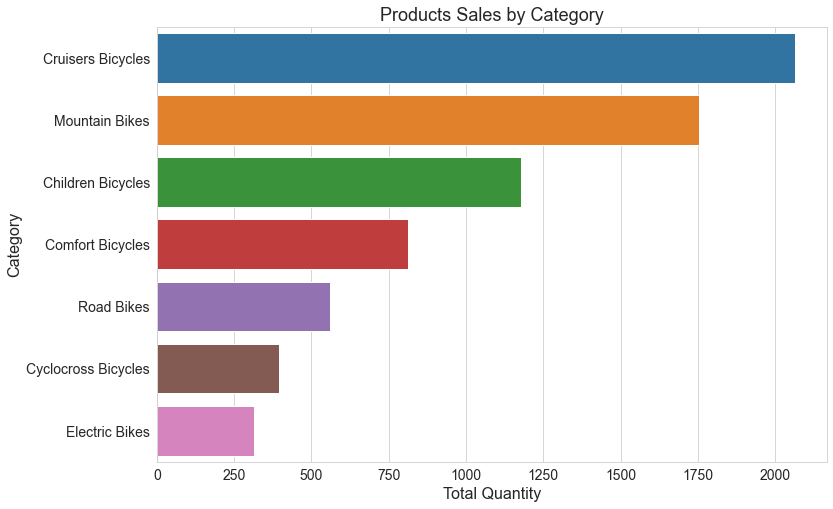

In [47]:
sns.set_style('whitegrid')
plt.figure(figsize = (12, 8))
sns.barplot(data = df, x = 'total_quantity', y= 'category_name')

plt.title('Products Sales by Category', fontsize = 18)
plt.xlabel('Total Quantity', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Category', fontsize = 16)
plt.yticks(fontsize = 14)
plt.show()

In [49]:
query = """ 
SELECT 
    brands.brand_name, 
    SUM(order_items.quantity) as total_quantity 

FROM order_items 
JOIN products ON 
order_items.product_id = products.product_id 
JOIN brands ON 
products.brand_id = brands.brand_id 

GROUP BY 
    brands.brand_name

ORDER BY 
    total_quantity desc
"""
df = pd.read_sql_query(query, connection)
df

,brand_name,total_quantity
0,Electra,2612
1,Trek,1839
2,Surly,908
3,Sun Bicycles,731
4,Pure Cycles,376
5,Haro,331
6,Heller,138
7,Ritchey,118
8,Strider,25


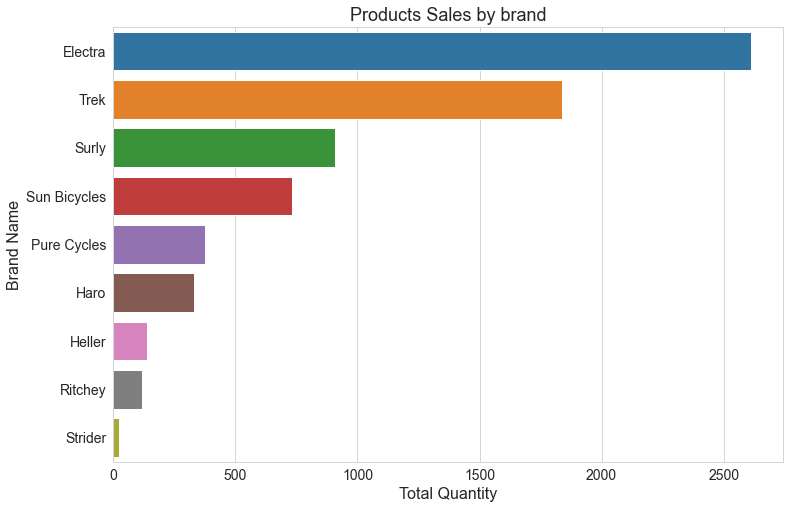

In [51]:
sns.set_style('whitegrid')
plt.figure(figsize = (12, 8))
sns.barplot(data = df, x = 'total_quantity', y= 'brand_name')

plt.title('')
plt.title('Products Sales by brand', fontsize = 18)
plt.xlabel('Total Quantity', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Brand Name',fontsize = 16)
plt.yticks(fontsize = 14)
plt.show()

In [18]:
#Best_seller by each brand 
query = """ 
SELECT 
a.brand_name,
a.product_name,
MAX(total_quantity) AS max_total_quantity


FROM
    (
    SELECT 
        products.product_name, 
        brands.brand_name, 
        products.product_id, 
        SUM(order_items.quantity) AS total_quantity
    
    FROM
        order_items
    JOIN products ON 
    order_items.product_id = products.product_id
    JOIN brands ON 
    brands.brand_id = products.brand_id
    
    GROUP BY
        brands.brand_name, products.product_id) AS a 

GROUP BY 
    a.brand_name

ORDER BY
    a.brand_name
"""
df = pd.read_sql_query(query, connection)
df

,brand_name,product_name,max_total_quantity
0,Electra,Electra Cruiser 1 (24-Inch) - 2016,157
1,Haro,Haro SR 1.2 - 2017,52
2,Heller,Heller Shagamaw Frame - 2016,129
3,Pure Cycles,Pure Cycles Western 3-Speed - Women's - 2015/2016,134
4,Ritchey,Ritchey Timberwolf Frameset - 2016,118
5,Strider,Strider Classic 12 Balance Bike - 2018,11
6,Sun Bicycles,Sun Bicycles Lil Bolt Type-R - 2017,60
7,Surly,Surly Ice Cream Truck Frameset - 2016,167
8,Trek,Trek Slash 8 27.5 - 2016,154


# Comparing total_orders received by stores 

In [35]:
query = """ 
SELECT 
    stores.store_id, 
    stores.store_name, 
    stores.city, SUM(order_items.quantity) AS total_orders

FROM 
    stores
JOIN orders ON 
stores.store_id = orders.store_id 
JOIN order_items ON
orders.order_id = order_items.order_id 

GROUP BY 
    stores.store_name, stores.store_id, stores.city

ORDER BY 
    total_orders desc

"""
df = pd.read_sql_query(query, connection)
df


,store_id,store_name,city,total_orders
0,2,Baldwin Bikes,Baldwin,4779
1,1,Santa Cruz Bikes,Santa Cruz,1516
2,3,Rowlett Bikes,Rowlett,783


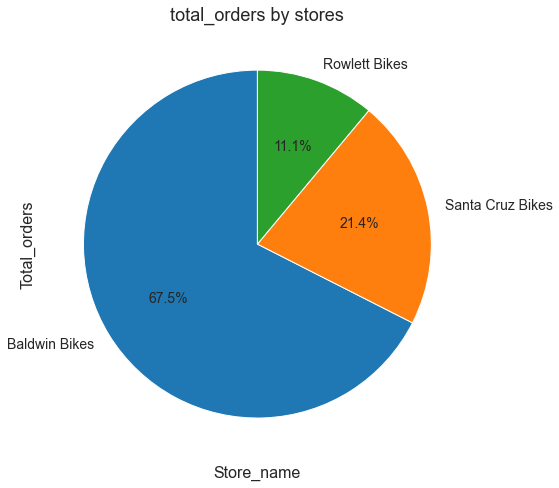

In [44]:
#changing 'total_orders' column to float 
df['total_orders'] = df['total_orders'].astype(float)
sns.set_style('whitegrid')
colors = sns.color_palette('pastel')
plt.figure(figsize = (12, 8))
plt.pie(labels = 'store_name', data = df, x = 'total_orders', autopct='%1.1f%%', startangle = 90, textprops = {'fontsize' : 14})

plt.title('total_orders by stores', fontsize = 18)
plt.xlabel('Store_name', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Total_orders',fontsize = 16)
plt.yticks(fontsize =14)
plt.show()

In [21]:
#Best_selling products by Store 
query = """
WITH StoreTotalOrders AS (
    SELECT
        stores.store_id,
        stores.store_name,
        stores.city,
        products.product_name,
        SUM(order_items.quantity) AS total_orders
    FROM stores
    JOIN orders ON stores.store_id = orders.store_id
    JOIN order_items ON orders.order_id = order_items.order_id
    JOIN products ON order_items.product_id = products.product_id
    GROUP BY stores.store_id, stores.store_name, stores.city, products.product_name
)
, MaxStoreOrders AS (
    SELECT
        store_id,
        MAX(total_orders) AS max_orders
    FROM StoreTotalOrders
    GROUP BY store_id
)
SELECT
    sto.store_id,
    sto.store_name,
    sto.city,
    sto.product_name AS best_selling_product,
    sto.total_orders
FROM StoreTotalOrders sto
JOIN MaxStoreOrders mso ON sto.store_id = mso.store_id
WHERE sto.total_orders = mso.max_orders;
"""

df = pd.read_sql_query(query, connection)
df

,store_id,store_name,city,best_selling_product,total_orders
0,1,Santa Cruz Bikes,Santa Cruz,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,59
1,2,Baldwin Bikes,Baldwin,Electra Cruiser 1 (24-Inch) - 2016,211
2,3,Rowlett Bikes,Rowlett,Electra Cruiser 1 (24-Inch) - 2016,41


# top 5 best_selling products by store 

In [22]:
query = """
WITH StoreTotalOrders AS (
    SELECT
        stores.store_id,
        stores.store_name,
        stores.city,
        products.product_name,
        SUM(order_items.quantity) AS total_orders
    
    FROM stores
    JOIN orders ON stores.store_id = orders.store_id
    JOIN order_items ON orders.order_id = order_items.order_id
    JOIN products ON order_items.product_id = products.product_id
    GROUP BY stores.store_id, stores.store_name, stores.city, products.product_name
)

SELECT
    sto.store_id,
    sto.store_name,
    sto.city,
    sto.product_name,
    sto.total_orders

FROM StoreTotalOrders sto

WHERE sto.store_id = 1

ORDER BY sto.total_orders DESC

LIMIT 5
"""

df = pd.read_sql_query(query, connection)
df

,store_id,store_name,city,product_name,total_orders
0,1,Santa Cruz Bikes,Santa Cruz,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,59
1,1,Santa Cruz Bikes,Santa Cruz,Electra Townie Original 7D EQ - 2016,56
2,1,Santa Cruz Bikes,Santa Cruz,Electra Townie Original 21D - 2016,52
3,1,Santa Cruz Bikes,Santa Cruz,Electra Moto 1 - 2016,50
4,1,Santa Cruz Bikes,Santa Cruz,Electra Cruiser 1 (24-Inch) - 2016,44


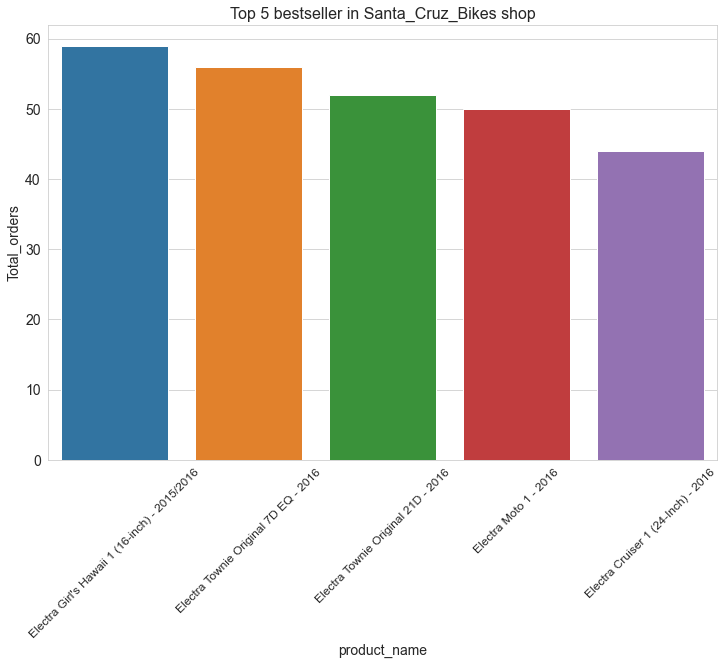

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize = (12, 8))
sns.barplot(data = df, x = 'product_name' , y = 'total_orders')

plt.title('Top 5 bestseller in Santa_Cruz_Bikes shop', fontsize = 16)
plt.xlabel('product_name', fontsize = 14)
plt.xticks(rotation=45, fontsize = 12)
plt.ylabel('Total_orders',fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [24]:
query = """
WITH StoreTotalOrders AS (
    SELECT
        stores.store_id,
        stores.store_name,
        stores.city,
        products.product_name,
        SUM(order_items.quantity) AS total_orders
    FROM stores
    JOIN orders ON stores.store_id = orders.store_id
    JOIN order_items ON orders.order_id = order_items.order_id
    JOIN products ON order_items.product_id = products.product_id
    GROUP BY stores.store_id, stores.store_name, stores.city, products.product_name
)

SELECT
    sto.store_id,
    sto.store_name,
    sto.city,
    sto.product_name,
    sto.total_orders
FROM StoreTotalOrders sto
WHERE sto.store_id = 2
ORDER BY sto.total_orders DESC
LIMIT 5
"""

df = pd.read_sql_query(query, connection)
df

,store_id,store_name,city,product_name,total_orders
0,2,Baldwin Bikes,Baldwin,Electra Cruiser 1 (24-Inch) - 2016,211
1,2,Baldwin Bikes,Baldwin,Electra Townie Original 7D EQ - 2016,205
2,2,Baldwin Bikes,Baldwin,Electra Townie Original 21D - 2016,203
3,2,Baldwin Bikes,Baldwin,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,181
4,2,Baldwin Bikes,Baldwin,Surly Ice Cream Truck Frameset - 2016,113


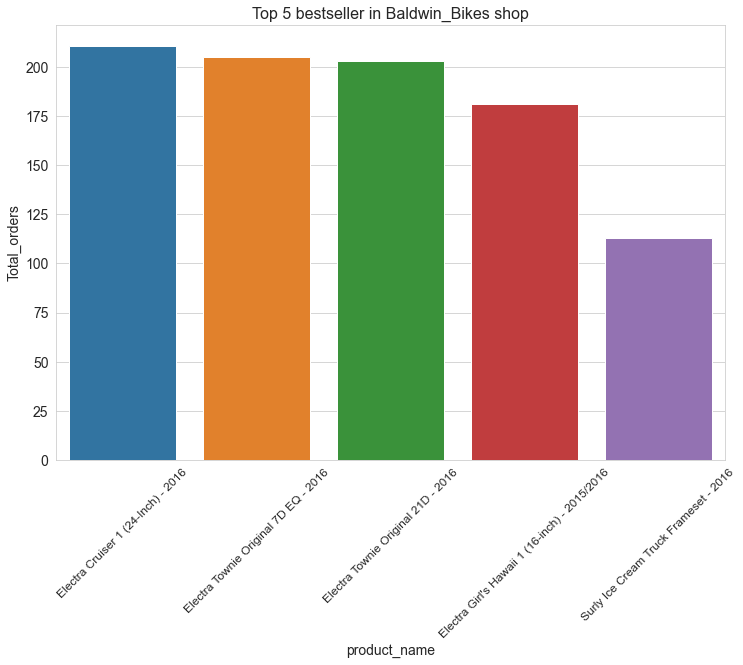

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize = (12, 8))
sns.barplot(data = df, x = 'product_name' , y = 'total_orders')

plt.title('Top 5 bestseller in Baldwin_Bikes shop', fontsize = 16)
plt.xlabel('product_name', fontsize = 14)
plt.xticks(rotation=45, fontsize = 12)
plt.ylabel('Total_orders',fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [26]:
query = """
WITH StoreTotalOrders AS (
    SELECT
        stores.store_id,
        stores.store_name,
        stores.city,
        products.product_name,
        SUM(order_items.quantity) AS total_orders
    FROM stores
    JOIN orders ON stores.store_id = orders.store_id
    JOIN order_items ON orders.order_id = order_items.order_id
    JOIN products ON order_items.product_id = products.product_id
    GROUP BY stores.store_id, stores.store_name, stores.city, products.product_name
)

SELECT
    sto.store_id,
    sto.store_name,
    sto.city,
    sto.product_name,
    sto.total_orders
FROM StoreTotalOrders sto
WHERE sto.store_id = 3
ORDER BY sto.total_orders DESC
LIMIT 5
"""

df = pd.read_sql_query(query, connection)
df

,store_id,store_name,city,product_name,total_orders
0,3,Rowlett Bikes,Rowlett,Electra Cruiser 1 (24-Inch) - 2016,41
1,3,Rowlett Bikes,Rowlett,Electra Townie Original 21D - 2016,34
2,3,Rowlett Bikes,Rowlett,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,29
3,3,Rowlett Bikes,Rowlett,Electra Townie Original 7D EQ - 2016,29
4,3,Rowlett Bikes,Rowlett,Trek Fuel EX 8 29 - 2016,21


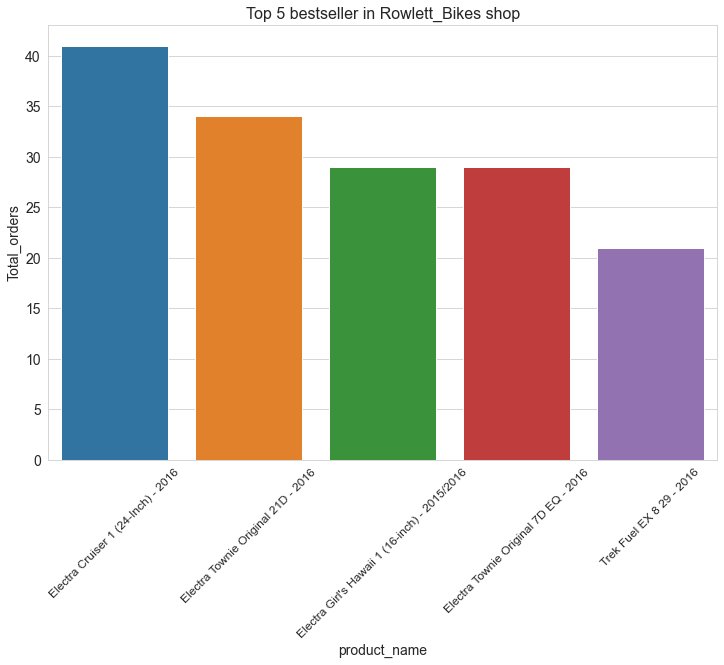

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize = (12, 8))
sns.barplot(data = df, x = 'product_name' , y = 'total_orders')

plt.title('Top 5 bestseller in Rowlett_Bikes shop', fontsize = 16)
plt.xlabel('product_name', fontsize = 14)
plt.xticks(rotation=45, fontsize = 12)
plt.ylabel('Total_orders',fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [28]:
query = """
WITH StoreTotalOrders AS (
    SELECT
        stores.store_id,
        stores.store_name,
        stores.city,
        products.product_name,
        SUM(order_items.quantity) AS total_orders
    FROM stores
    JOIN orders ON stores.store_id = orders.store_id
    JOIN order_items ON orders.order_id = order_items.order_id
    JOIN products ON order_items.product_id = products.product_id
    GROUP BY stores.store_id, stores.store_name, stores.city, products.product_name
)

SELECT
    sto.store_id,
    sto.store_name,
    sto.city,
    sto.product_name,
    sto.total_orders,
    
    CASE
        WHEN sto.total_orders = MAX(sto.total_orders) OVER(PARTITION BY sto.store_id) THEN 'BEST_SELLER'
        ELSE 'other products'
    
    END AS products_distribution

FROM StoreTotalOrders sto
WHERE sto.store_id = 1 
ORDER BY sto.total_orders DESC
LIMIT 15
"""

df = pd.read_sql_query(query, connection)
df

,store_id,store_name,city,product_name,total_orders,products_distribution
0,1,Santa Cruz Bikes,Santa Cruz,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,59,BEST_SELLER
1,1,Santa Cruz Bikes,Santa Cruz,Electra Townie Original 7D EQ - 2016,56,other products
2,1,Santa Cruz Bikes,Santa Cruz,Electra Townie Original 21D - 2016,52,other products
3,1,Santa Cruz Bikes,Santa Cruz,Electra Moto 1 - 2016,50,other products
4,1,Santa Cruz Bikes,Santa Cruz,Electra Cruiser 1 (24-Inch) - 2016,44,other products
5,1,Santa Cruz Bikes,Santa Cruz,Trek Conduit+ - 2016,39,other products
6,1,Santa Cruz Bikes,Santa Cruz,Surly Straggler 650b - 2016,38,other products
7,1,Santa Cruz Bikes,Santa Cruz,Surly Straggler - 2016,36,other products
8,1,Santa Cruz Bikes,Santa Cruz,Electra Townie Original 7D - 2015/2016,34,other products
9,1,Santa Cruz Bikes,Santa Cruz,Ritchey Timberwolf Frameset - 2016,34,other products


# FINDINGS 


1. One-time buyer outnumber repeat buyer by about 10 times. 

2. repeat_buyers re-purchase most likely in one to two years after previous purchase.

3. Best_selling products type is "Cruiser-bicycle" 

4. Best_selling product Name is "Electra Cruiser 1 (24-INCH) 2016 model" 

5. Best_selling brand name is "Eletra" 

6. Baldwind bicycle shop from Baldwind sells significantly more products than other two stores. 

7. about 87% of top5 most selling products by stores is from "Electra" brand.

8. The Top two most sold bicycle types from 2016 to 2018 were Cruiser and Mountain bicycle. 

9. Cyclocross bike sales rate decreases every year. 